In [20]:
import tensorflow as tf
import os

In [21]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpy in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
    

In [22]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt

In [23]:
data_dir='data'

In [24]:
image_exts=['jpeg','jpg','bmp','png']

In [25]:
import numpy as np

In [26]:
data=tf.keras.utils.image_dataset_from_directory('data',batch_size=32) #this builds the dataset

Found 1218 files belonging to 11 classes.


In [27]:
data_iterator=data.as_numpy_iterator() # to iterate as data isnt iterable. it is genetared on the fly

In [28]:
batch=data_iterator.next()

In [29]:
batch[0].shape #images represented as numpy arrays

(32, 256, 256, 3)

In [30]:
batch[1] #represents which image belongs to which class

array([ 7,  1,  8,  9, 10,  0,  9,  8,  1,  3,  2,  2,  6,  8,  4,  3,  7,
        9,  0,  3,  9,  8,  2,  0,  5,  8,  4,  7,  3,  8,  0,  5])

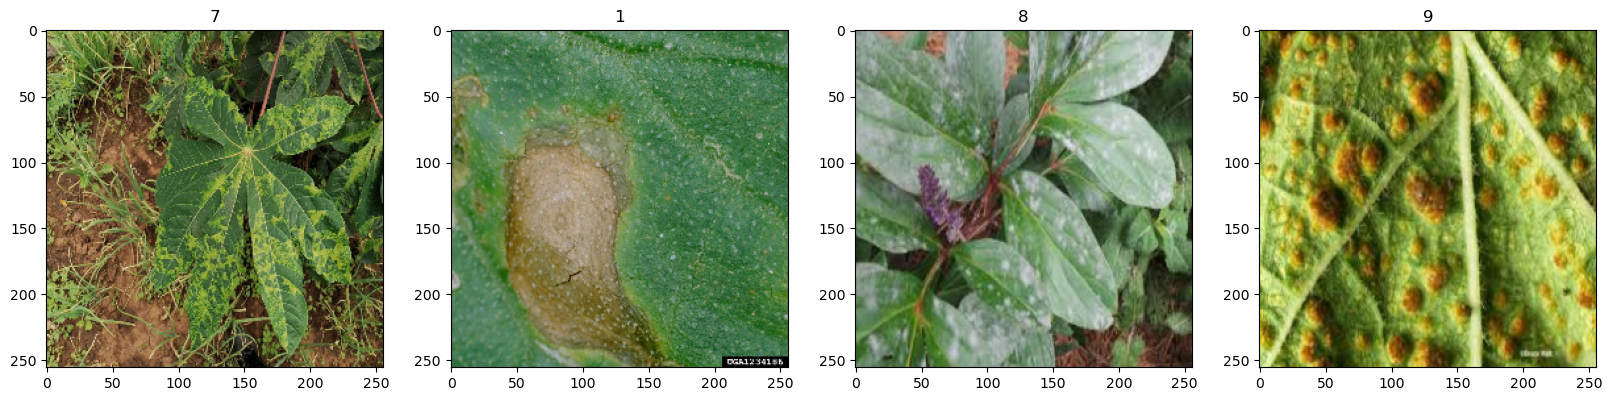

In [31]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [32]:
data=data.map(lambda x,y:(x/255,y))

In [33]:
scaled_iterator=data.as_numpy_iterator()

In [34]:
batch=scaled_iterator.next()

In [35]:
batch[0].max()

1.0

In [36]:
len(data)

39

In [37]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)

In [38]:
test_size

3

In [39]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [40]:
len(test)

3

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D, MaxPooling2D,Dense,Flatten,Dropout

In [42]:
model=Sequential()

In [43]:
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))
# model.add(Dense(1,activation='sigmoid')) it is for 2 outputs

C:\aiml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),  # For sparse labels (integer labels)
              metrics=['accuracy'])


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 253, 253, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,699,195 (14.11 MB)

 Trainable params: 3,699,195 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
logdir='logs'

In [47]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [48]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - accuracy: 0.1142 - loss: 2.6565 - val_accuracy: 0.1339 - val_loss: 2.3435
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.1339 - loss: 2.3421 - val_accuracy: 0.2232 - val_loss: 2.2973
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.2164 - loss: 2.2556 - val_accuracy: 0.2857 - val_loss: 2.1162
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.2960 - loss: 2.0482 - val_accuracy: 0.3259 - val_loss: 2.0457
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.4192 - loss: 1.8627 - val_accuracy: 0.4107 - val_loss: 1.9756
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.5357 - loss: 1.6036 - val_accuracy: 0.4866 - val_loss: 1.6053
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 0.6195 - loss: 1.2389 - val_accuracy: 0.6027 - val_loss: 1.3299
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 0.7711 - loss: 0.8361 - val_accuracy: 0.

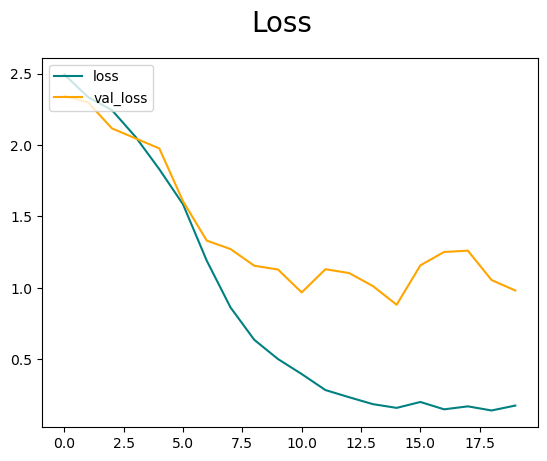

In [49]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

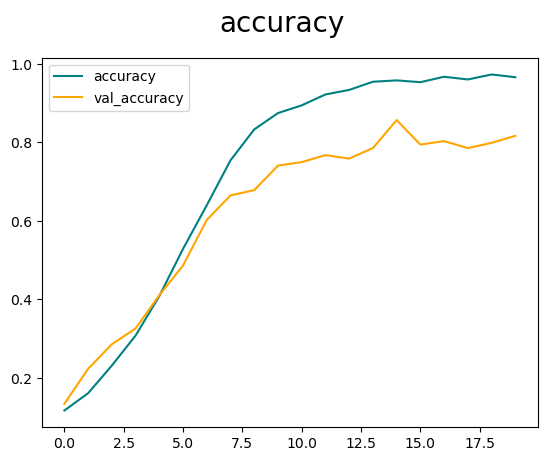

In [50]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [51]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [52]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [53]:


# Assuming you have pre, re, acc metrics defined already
for batch in test.as_numpy_iterator():
    X, y = batch
    y_true_one_hot = tf.keras.utils.to_categorical(y, num_classes=11)
    yhat = model.predict(X)
    
    # Update state of metrics with one-hot encoded y_true and yhat
    pre.update_state(y_true_one_hot, yhat)
    re.update_state(y_true_one_hot, yhat)
    acc.update_state(y_true_one_hot, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [54]:
print(pre.result().numpy()," ",re.result().numpy()," ",acc.result().numpy())

0.78571427   0.6875   0.9545455


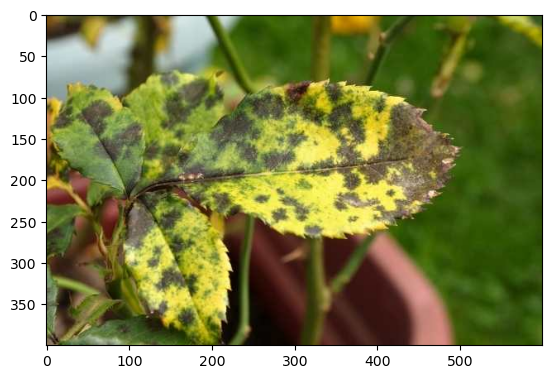

In [55]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('test.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying correctly in matplotlib
plt.imshow(img_rgb)
plt.show()

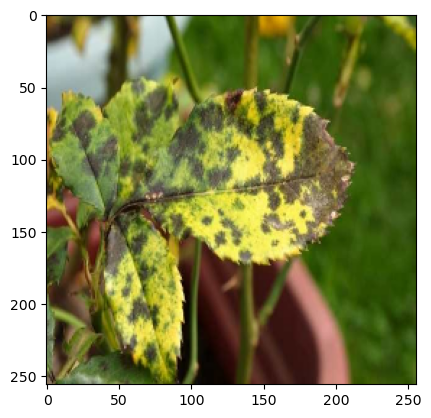

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Predicted class is blackspot


In [56]:
resize = tf.image.resize(img_rgb, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

# Normalize the image
normalized_img = resize / 255.0

yhat = model.predict(np.expand_dims(normalized_img, 0))

class_names = ['blackspot', 'blight', 'canker', 'Clubroot', 'downey mildew', 
               'greymold', 'leafspot', 'mosaic', 'powdery mildew', 'rust', 'wilt']

predicted_class_index = np.argmax(yhat)
predicted_class_name = class_names[predicted_class_index]
print(f'Predicted class is {predicted_class_name}')
